In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcdefaults
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv('nationalshutdown.csv')


C:\Users\willi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [31]:
df['retweeted'].value_counts()

False    300
Name: retweeted, dtype: int64

## Changing the created_at variable to datetime 

In [2]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [3]:
df['created_at'].unique()

<DatetimeArray>
['2021-08-23 17:38:01+00:00', '2021-08-23 17:37:59+00:00',
 '2021-08-23 17:37:58+00:00', '2021-08-23 17:37:57+00:00',
 '2021-08-23 17:37:56+00:00', '2021-08-23 17:37:54+00:00',
 '2021-08-23 17:37:53+00:00', '2021-08-23 17:37:52+00:00',
 '2021-08-23 17:37:48+00:00', '2021-08-23 17:37:46+00:00',
 ...
 '2021-08-23 17:21:36+00:00', '2021-08-23 17:21:35+00:00',
 '2021-08-23 17:21:31+00:00', '2021-08-23 17:21:30+00:00',
 '2021-08-23 17:21:28+00:00', '2021-08-23 17:21:27+00:00',
 '2021-08-23 17:21:25+00:00', '2021-08-23 17:21:23+00:00',
 '2021-08-23 17:21:20+00:00', '2021-08-23 17:21:19+00:00']
Length: 256, dtype: datetime64[ns, UTC]

In [9]:
df['hour_created'] = df['created_at'].dt.hour

In [10]:
df['hour_created'].value_counts()

17    300
Name: hour_created, dtype: int64

In [4]:
df['minute_created'] = df['created_at'].dt.minute

In [5]:
df['minute_created'].value_counts()

23    27
37    24
35    23
25    22
28    20
21    18
33    18
22    18
31    17
34    16
32    16
27    15
24    14
36    13
30    13
29    12
26    12
38     2
Name: minute_created, dtype: int64

In [6]:
scatter = df[['minute_created', 'retweet_count']]

In [7]:
scatter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   minute_created  300 non-null    int64
 1   retweet_count   300 non-null    int64
dtypes: int64(2)
memory usage: 4.8 KB


<AxesSubplot:xlabel='minute_created', ylabel='retweet_count'>

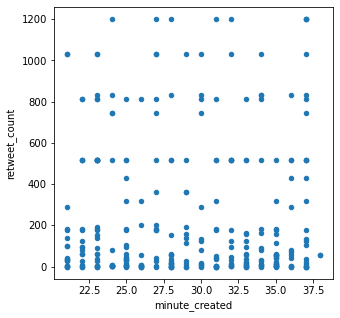

In [8]:
scatter.plot(x='minute_created' , y='retweet_count', kind='scatter', figsize=(5,5))

# Cleaning the text column

In [11]:
##Changing to lower case
df['text'] = df['text'].apply(lambda x: x.lower())

In [12]:
##Removing any unicode characters
df['text'] = df['text'].apply(lambda x: x.encode('ascii', 'ignore').decode())

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in stop]))

In [15]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [16]:
df['text'] = df['text'].apply(punctuation_removal)

In [17]:
sentences = []

for word in df['text']:
    sentences.append(word)

In [18]:
lines = list()

for line in sentences:
    w = line.split()
    for i in w:
        lines.append(i)

In [19]:
##Stemming reduces the word to it's base word
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

In [20]:
stem = []
for word in lines:
    stem.append(s_stemmer.stem(word))

In [21]:
from nltk.probability import FreqDist
df2 = pd.DataFrame(stem)

df2 = df2[0].value_counts()

freq = FreqDist()


for word in df2:
    
    freq[word] +=1


In [22]:
freq

FreqDist({1: 481, 2: 197, 3: 92, 4: 41, 6: 28, 8: 25, 5: 24, 7: 13, 9: 12, 10: 11, ...})

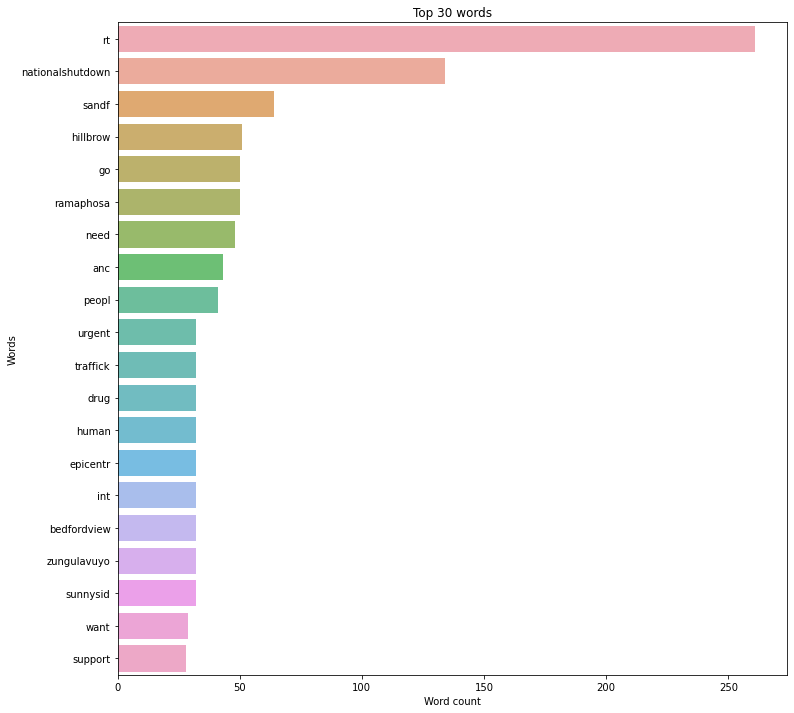

In [33]:
# rt - retweet
Top30 = df2[:30]

plt.figure(figsize=(12,12))
sns.barplot(Top20.values, Top20.index, alpha=0.8)
plt.title('Top 30 words')
plt.ylabel('Words')
plt.xlabel('Word count')
plt.show()

# Sandf - South African National Defence Force
# Hillbrow is an inner city residential neighbourhood of Johannesburg, Gauteng Province, South Africa.
# Cyril Ramaphosa - President of South Africa